In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [4]:
import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/tmp/ipykernel_37990/644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10343,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943165e+07,1.943165e+07,False,NaN,1,NaN,NaN,None,2023-07-17T10:50:00.000Z,30172.133745,9.252226e+09,18.5111,-0.124382,-0.463060,-0.181205,13.425708,10.200301,0.874848,5.862943e+11,48.7518,6.336148e+11,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202010e+08,1.202010e+08,True,NaN,2,NaN,NaN,None,2023-07-17T10:50:00.000Z,1909.857619,4.824113e+09,15.2747,-0.606382,-1.101760,2.449100,9.579695,4.485747,-9.289129,2.295668e+11,19.0987,2.295668e+11,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502
2,825,Tether,USDT,tether,56999,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.364937e+10,8.671579e+10,True,NaN,3,NaN,NaN,None,2023-07-17T10:49:00.000Z,1.000277,1.935720e+10,15.3605,-0.008431,-0.003355,0.033644,0.091833,0.031817,-0.019605,8.367258e+10,6.9611,8.673985e+10,None,2023-07-17T10:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-17 10:51:44.124502
3,52,XRP,XRP,xrp,994,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-17T10:50:00.000Z,0.738274,3.694066e+09,33.7482,0.349013,0.239656,56.268464,52.990923,60.054149,43.009393,3.879194e+10,3.2236,7.382740e+10,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502
4,1839,BNB,BNB,bnb,1511,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558486e+08,1.558486e+08,False,NaN,5,NaN,NaN,None,2023-07-17T10:50:00.000Z,241.451990,6.070827e+08,53.3659,-0.539881,-3.450149,-0.694426,-2.004406,-22.943022,-29.828873,3.762996e+10,3.1312,3.762996e+10,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502
5,3408,USD Coin,USDC,usd-coin,13343,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.726659e+10,2.726659e+10,False,NaN,6,NaN,NaN,None,2023-07-17T10:49:00.000Z,0.999951,2.297646e+09,16.6021,-0.011675,0.000547,-0.003498,-0.003752,-0.006902,-0.013387,2.726526e+10,2.2657,2.726526e+10,None,2023-07-17T10:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-17 10:51:44.124502
6,5426,Solana,SOL,solana,488,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.026829e+08,5.526200e+08,True,NaN,8,NaN,NaN,None,2023-07-17T10:49:00.000Z,26.992921,7.415003e+08,-21.4407,-1.762182,-3.041757,29.668415,69.597427,29.577595,6.807567,1.086959e+10,0.9043,1.491683e+10,None,2023-07-17T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502
7,2010,Cardano,ADA,cardano,875,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.497845e+10,3.598361e+10,False,NaN,8,NaN,NaN,None,2023-07-17T10:50:00.000Z,0.311178,2.858885e+08,13.6120,-0.878776,-3.225765,8.859770,15.490255,-17.890604,-30.083814,1.088453e+10,0.9057,1.400301e+10,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502
8,74,Dogecoin,DOGE,dogecoin,744,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()

/tmp/ipykernel_37990/221700078.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
/tmp/ipykernel_37990/221700078.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed successfully


KeyboardInterrupt: 

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10343,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.943165e+07,1.943165e+07,False,NaN,1,NaN,NaN,None,2023-07-17T10:50:00.000Z,30172.133745,9.252226e+09,18.5111,-0.124382,-0.463060,-0.181205,13.425708,10.200301,0.874848,5.862943e+11,48.7518,6.336148e+11,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202010e+08,1.202010e+08,True,NaN,2,NaN,NaN,None,2023-07-17T10:50:00.000Z,1909.857619,4.824113e+09,15.2747,-0.606382,-1.101760,2.449100,9.579695,4.485747,-9.289129,2.295668e+11,19.0987,2.295668e+11,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
2,825,Tether,USDT,tether,56999,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.364937e+10,8.671579e+10,True,NaN,3,NaN,NaN,None,2023-07-17T10:49:00.000Z,1.000277,1.935720e+10,15.3605,-0.008431,-0.003355,0.033644,0.091833,0.031817,-0.019605,8.367258e+10,6.9611,8.673985e+10,None,2023-07-17T10:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-17 10:51:44.124502,NaT
3,52,XRP,XRP,xrp,994,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.254409e+10,9.998862e+10,False,NaN,4,NaN,NaN,None,2023-07-17T10:50:00.000Z,0.738274,3.694066e+09,33.7482,0.349013,0.239656,56.268464,52.990923,60.054149,43.009393,3.879194e+10,3.2236,7.382740e+10,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
4,1839,BNB,BNB,bnb,1511,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558486e+08,1.558486e+08,False,NaN,5,NaN,NaN,None,2023-07-17T10:50:00.000Z,241.451990,6.070827e+08,53.3659,-0.539881,-3.450149,-0.694426,-2.004406,-22.943022,-29.828873,3.762996e+10,3.1312,3.762996e+10,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
5,3408,USD Coin,USDC,usd-coin,13343,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.726659e+10,2.726659e+10,False,NaN,6,NaN,NaN,None,2023-07-17T10:49:00.000Z,0.999951,2.297646e+09,16.6021,-0.011675,0.000547,-0.003498,-0.003752,-0.006902,-0.013387,2.726526e+10,2.2657,2.726526e+10,None,2023-07-17T10:49:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-17 10:51:44.124502,NaT
6,5426,Solana,SOL,solana,488,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.026829e+08,5.526200e+08,True,NaN,8,NaN,NaN,None,2023-07-17T10:49:00.000Z,26.992921,7.415003e+08,-21.4407,-1.762182,-3.041757,29.668415,69.597427,29.577595,6.807567,1.086959e+10,0.9043,1.491683e+10,None,2023-07-17T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
7,2010,Cardano,ADA,cardano,875,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.497845e+10,3.598361e+10,False,NaN,8,NaN,NaN,None,2023-07-17T10:50:00.000Z,0.311178,2.858885e+08,13.6120,-0.878776,-3.225765,8.859770,15.490255,-17.890604,-30.083814,1.088453e+10,0.9057,1.400301e+10,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
8,74,Dogecoin,DOGE,dogecoin,744,2013-12-15T00:00:00.000Z,"[mineable, po

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10343,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19431650.00000,19431650.00000,False,NaN,1,NaN,NaN,None,2023-07-17T10:50:00.000Z,30172.13374,9252226400.52349,18.51110,-0.12438,-0.46306,-0.18120,13.42571,10.20030,0.87485,586294342682.12280,48.75180,633614808640.78003,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
1,1027,Ethereum,ETH,ethereum,7124,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120201013.32982,120201013.32982,True,NaN,2,NaN,NaN,None,2023-07-17T10:50:00.000Z,1909.85762,4824112640.75063,15.27470,-0.60638,-1.10176,2.44910,9.57969,4.48575,-9.28913,229566821174.25897,19.09870,229566821174.26001,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
2,825,Tether,USDT,tether,56999,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83649374839.93829,86715788906.06107,True,NaN,3,NaN,NaN,None,2023-07-17T10:49:00.000Z,1.00028,19357200340.87303,15.36050,-0.00843,-0.00335,0.03364,0.09183,0.03182,-0.01961,83672581068.32324,6.96110,86739845827.06000,None,2023-07-17T10:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-17 10:51:44.124502,NaT
3,52,XRP,XRP,xrp,994,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52544091958.00000,99988621362.00000,False,NaN,4,NaN,NaN,None,2023-07-17T10:50:00.000Z,0.73827,3694066364.75329,33.74820,0.34901,0.23966,56.26846,52.99092,60.05415,43.00939,38791935574.85113,3.22360,73827397390.10001,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
4,1839,BNB,BNB,bnb,1511,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155848611.56864,155848611.56864,False,NaN,5,NaN,NaN,None,2023-07-17T10:50:00.000Z,241.45199,607082677.86308,53.36590,-0.53988,-3.45015,-0.69443,-2.00441,-22.94302,-29.82887,37629957377.40921,3.13120,37629957377.41000,None,2023-07-17T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
5,3408,USD Coin,USDC,usd-coin,13343,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27266592591.45823,27266592591.45823,False,NaN,6,NaN,NaN,None,2023-07-17T10:49:00.000Z,0.99995,2297645762.16550,16.60210,-0.01168,0.00055,-0.00350,-0.00375,-0.00690,-0.01339,27265258085.90337,2.26570,27265258085.90000,None,2023-07-17T10:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-17 10:51:44.124502,NaT
6,5426,Solana,SOL,solana,488,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,402682913.56779,552619997.00859,True,NaN,8,NaN,NaN,None,2023-07-17T10:49:00.000Z,26.99292,741500307.01579,-21.44070,-1.76218,-3.04176,29.66841,69.59743,29.57759,6.80757,10869587961.71410,0.90430,14916827768.20000,None,2023-07-17T10:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-17 10:51:44.124502,NaT
7,2010,Cardano,ADA,cardano,875,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34978453358.68600,35983607755.52800,False,NaN,8,NaN,NaN,None,2023-07-17T10:50:00.000Z,0.31118,285888518.96169,13.61200,-0.87878,-3.22576,8.85977,15.49025,-17.89060,-30.08381,10884526931.34623,0.90570,14003012279.8

In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12438,-0.46306,-0.18120,13.42571,10.20030,0.87485
Ethereum,-0.60638,-1.10176,2.44910,9.57969,4.48575,-9.28913
Tether,-0.00843,-0.00335,0.03364,0.09183,0.03182,-0.01961
XRP,0.34901,0.23966,56.26846,52.99092,60.05415,43.00939
BNB,-0.53988,-3.45015,-0.69443,-2.00441,-22.94302,-29.82887
USD Coin,-0.01168,0.00055,-0.00350,-0.00375,-0.00690,-0.01339
Solana,-1.76218,-3.04176,29.66841,69.59743,29.57759,6.80757
Cardano,-0.87878,-3.22576,8.85977,15.49025,-17.89060,-30.08381
Dogecoin,-1.29925,-2.64620,6.49831,10.17423,-6.95007,-25.89113


In [14]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.12438
              quote.USD.percent_change_24h    -0.46306
              quote.USD.percent_change_7d     -0.18120
              quote.USD.percent_change_30d    13.42571
              quote.USD.percent_change_60d    10.20030
              quote.USD.percent_change_90d     0.87485
Ethereum      quote.USD.percent_change_1h     -0.60638
              quote.USD.percent_change_24h    -1.10176
              quote.USD.percent_change_7d      2.44910
              quote.USD.percent_change_30d     9.57969
              quote.USD.percent_change_60d     4.48575
              quote.USD.percent_change_90d    -9.28913
Tether        quote.USD.percent_change_1h     -0.00843
              quote.USD.percent_change_24h    -0.00335
              quote.USD.percent_change_7d      0.03364
              quote.USD.percent_change_30d     0.09183
              quote.USD.percent_change_60d     0.03182
              quote.US

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.12438
             quote.USD.percent_change_24h  -0.46306
             quote.USD.percent_change_7d   -0.18120
             quote.USD.percent_change_30d  13.42571
             quote.USD.percent_change_60d  10.20030
             quote.USD.percent_change_90d   0.87485
Ethereum     quote.USD.percent_change_1h   -0.60638
             quote.USD.percent_change_24h  -1.10176
             quote.USD.percent_change_7d    2.44910
             quote.USD.percent_change_30d   9.57969
             quote.USD.percent_change_60d   4.48575
             quote.USD.percent_change_90d  -9.28913
Tether       quote.USD.percent_change_1h   -0.00843
             quote.USD.percent_change_24h  -0.00335
             quote.USD.percent_change_7d    0.03364
             quote.USD.percent_change_30d   0.09183
             quote.USD.percent_change_60d   0.03182
             quote.USD.percent_change_90d  -0.01961
XRP          quote.USD.percent_change_1h    0.34901
             quote.USD.percent_change_24h   0.23966
             quote.USD.percent_change_7d   56.26846
             quote.USD.percent_change_30d  52.99092
             quote.USD.percent_change_60d  60.05415
             quote.USD.percent_change_90d  43.00939
BNB          quote.USD.percent_change_1h   -0.53988
             quote.USD.percent_change_24h  -3.45015
             quote.USD.percent_change_7d   -0.69443
             quote.USD.percent_change_30d  -2.00441
             quote.USD.percent_change_60d -22.94302
             quote.USD.percent_change_90d -29.82887
USD Coin     quote.USD.percent_change_1h   -0.01168
             quote.USD.percent_change_24h   0.00055
             quote.USD.percent_change_7d   -0.00350
             quote.USD.percent_change_30d  -0.00375
             quote.USD.percent_change_60d  -0.00690
             quote.USD.percent_change_90d  -0.01339
Solana       quote.USD.percent_change_1h   -1.76218
             quote.USD.percent_change_24h  -3.04176
             quote.USD.percent_change_7d   29.66841
             quote.USD.percent_change_30d  69.59743
             quote.USD.percent_change_60d  29.57759
             quote.USD.percent_change_90d   6.80757
Cardano      quote.USD.percent_change_1h   -0.87878
             quote.USD.percent_change_24h  -3.22576
             quote.USD.percent_change_7d    8.85977
             quote.USD.percent_change_30d  15.49025
             quote.USD.percent_change_60d -17.89060
             quote.USD.percent_change_90d -30.08381
Dogecoin     quote.USD.percent_change_1h   -1.29925
             quote.USD.percent_change_24h  -2.64620
             quote.USD.percent_change_7d    6.49831
             quote.USD.percent_change_30d  10.17423
             quote.USD.percent_change_60d  -6.95007
             quote.USD.percent_change_90d -25.89113
TRON         quote.USD.percent_change_1h   -0.63985
             quote.USD.percent_change_24h  -0.78646
             quote.USD.percent_change_7d    3.53516
             quote.USD.percent_change_30d  11.53704
             quote.USD.percent_change_60d  12.24691
             quote.USD.percent_change_90d  19.80426
Polygon      quote.USD.percent_change_1h   -1.16456
             quote.USD.percent_change_24h  -2.97529
             quote.USD.percent_change_7d   11.92795
             quote.USD.percent_change_30d  22.14338
             quote.USD.percent_change_60d -13.13664
             quote.USD.percent_change_90d -35.12598
Litecoin     quote.USD.percent_change_1h   -2.06365
             quote.USD.percent_change_24h  -4.08050
             quote.USD.percent_change_7d   -3.66787
             quote.USD.percent_change_30d  17.20227
             quote.USD.percent_change_60d  -2.60259
             quote.USD.percent_change_90d -10.96916
Polkadot     quote.USD.percent_change_1h   -1.54926
             quote.USD.percent_change_24h  -2.30051
             quote.USD.percent_change_7d    3.64934
             quote.USD.percent_change_30d

In [17]:
type(df5)

pandas.core.frame.DataFrame

In [18]:
df5.count()

values    90
dtype: int64

In [19]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12438
1,Bitcoin,quote.USD.percent_change_24h,-0.46306
2,Bitcoin,quote.USD.percent_change_7d,-0.18120
3,Bitcoin,quote.USD.percent_change_30d,13.42571
4,Bitcoin,quote.USD.percent_change_60d,10.20030
5,Bitcoin,quote.USD.percent_change_90d,0.87485
6,Ethereum,quote.USD.percent_change_1h,-0.60638
7,Ethereum,quote.USD.percent_change_24h,-1.10176
8,Ethereum,quote.USD.percent_change_7d,2.44910
9,Ethereum,quote.USD.percent_change_30d,9.57969


In [20]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12438
1,Bitcoin,quote.USD.percent_change_24h,-0.46306
2,Bitcoin,quote.USD.percent_change_7d,-0.18120
3,Bitcoin,quote.USD.percent_change_30d,13.42571
4,Bitcoin,quote.USD.percent_change_60d,10.20030
5,Bitcoin,quote.USD.percent_change_90d,0.87485
6,Ethereum,quote.USD.percent_change_1h,-0.60638
7,Ethereum,quote.USD.percent_change_24h,-1.10176
8,Ethereum,quote.USD.percent_change_7d,2.44910
9,Ethereum,quote.USD.percent_change_30d,9.57969


In [24]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12438
1,Bitcoin,24h,-0.46306
2,Bitcoin,7d,-0.18120
3,Bitcoin,30d,13.42571
4,Bitcoin,60d,10.20030
5,Bitcoin,90d,0.87485
6,Ethereum,1h,-0.60638
7,Ethereum,24h,-1.10176
8,Ethereum,7d,2.44910
9,Ethereum,30d,9.57969


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

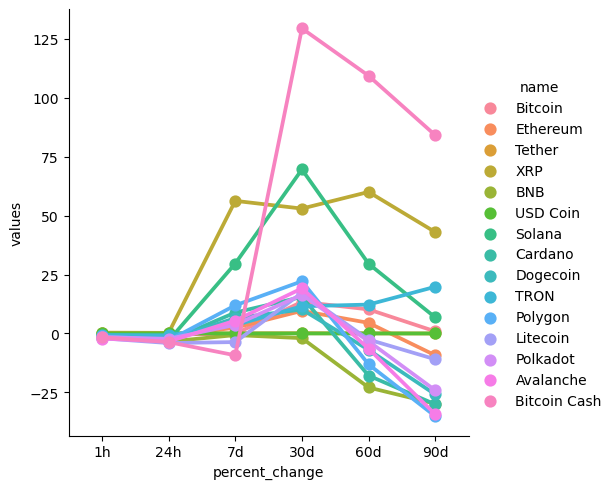

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [26]:
df8 = df[['name','quote.USD.price','timestamp']]
df8

,name,quote.USD.price,timestamp
0,Bitcoin,30172.13374,2023-07-17 10:51:44.124502
1,Ethereum,1909.85762,2023-07-17 10:51:44.124502
2,Tether,1.00028,2023-07-17 10:51:44.124502
3,XRP,0.73827,2023-07-17 10:51:44.124502
4,BNB,241.45199,2023-07-17 10:51:44.124502
5,USD Coin,0.99995,2023-07-17 10:51:44.124502
6,Solana,26.99292,2023-07-17 10:51:44.124502
7,Cardano,0.31118,2023-07-17 10:51:44.124502
8,Dogecoin,0.06902,2023-07-17 10:51:44.124502
9,TRON,0.07956,2023-07-17 10:51:44.124502


In [35]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name =='Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,30172.13374,2023-07-17 10:51:44.124502
0,Bitcoin,30172.13374,NaT


In [36]:
df9 = df[['name','quote.USD.price','timestamp']]
df9

,name,quote.USD.price,timestamp
0,Bitcoin,30172.13374,2023-07-17 10:51:44.124502
1,Ethereum,1909.85762,2023-07-17 10:51:44.124502
2,Tether,1.00028,2023-07-17 10:51:44.124502
3,XRP,0.73827,2023-07-17 10:51:44.124502
4,BNB,241.45199,2023-07-17 10:51:44.124502
5,USD Coin,0.99995,2023-07-17 10:51:44.124502
6,Solana,26.99292,2023-07-17 10:51:44.124502
7,Cardano,0.31118,2023-07-17 10:51:44.124502
8,Dogecoin,0.06902,2023-07-17 10:51:44.124502
9,TRON,0.07956,2023-07-17 10:51:44.124502


<Axes: xlabel='name', ylabel='quote.USD.price'>

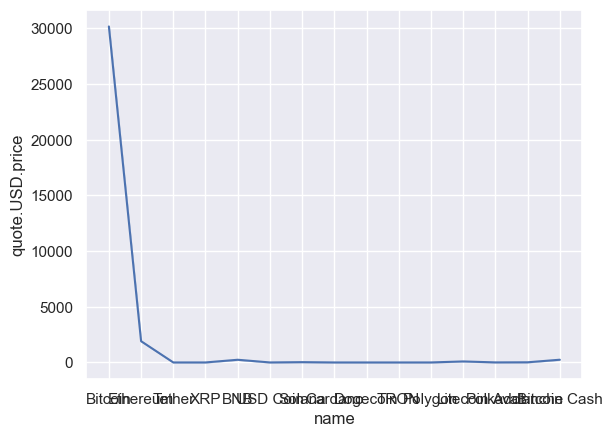

In [38]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='name', y='quote.USD.price', data = df9)
